# Trabalho Ac2

## Bibliotecas utilizadas

In [1]:
import pandas as pd
import librosa
import librosa.display
import librosa.feature
import matplotlib.pyplot as plt
import numpy as np
import os
import IPython.display as ipd

#### Aqui temos o dataset sem qualquer alteração.

In [2]:
df = pd.read_csv('C:/Users/andre/Documents/Faculdade/3ano_1sem/ACII/UrbanSound8K/metadata/UrbanSound8K.csv')

df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


#### Aqui optamos por fazer uma lista com as labels de modo a posteriormente utilizarmos para fazer o training e test set

In [3]:
for coluna in df.columns:
    i=coluna
    labels = df[i].tolist()
    print(coluna)
print(labels)

slice_file_name
fsID
start
end
salience
fold
classID
class
['dog_bark', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'dog_bark', 'dog_bark',

### Distribuição das classes

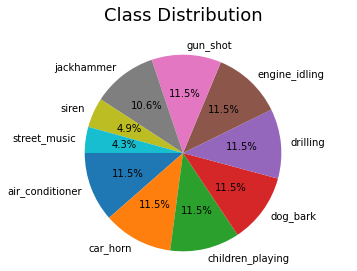

In [4]:
class_dict = df['class'].value_counts(normalize=True)
classes = list(np.unique(df['class']))
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08, fontsize=18)
ax.pie(class_dict, labels=classes, autopct='%1.1f%%', shadow=False, startangle=180)
ax.axis('equal')
plt.savefig("distribution_class")
plt.show(block=False)

### Função para padronizar o aúdio de modo a todos terem 4 segundos

In [5]:
# Função para comprimir ou estender o áudio para 4 segundos
def adjust_audio_duration(audio_path, target_duration=4.0):
    y, sr = librosa.load(audio_path, sr=None)  # Carrega o arquivo de áudio

    # Calcula a duração atual do áudio
    current_duration = librosa.get_duration(y=y, sr=sr)

    # Se a duração atual for menor que a meta, estende o áudio com zeros
    if current_duration < target_duration:
        y_adjusted = np.pad(y, (0, int((target_duration - current_duration) * sr)), 'constant')
    # Se a duração atual for maior que a meta, corta o áudio
    else:
        y_adjusted = y[:int(target_duration * sr)]

    return y_adjusted, sr

In [6]:
audio_folder = 'C:/Users/andre/Documents/Faculdade/3ano_1sem/ACII/UrbanSound8K/audio/fold1'

# Lista o conteúdo do diretório
audio_folder2 = os.listdir(audio_folder)

# Ordena os arquivos por número de forma ascendente
sorted_files = sorted(audio_folder2, key=lambda x: int(''.join(filter(str.isdigit, x))) if any(c.isdigit() for c in x) else float('inf'))
count=0
for item in sorted_files:
    print(item)
    count+=1
print(count)

7061-6-0-0.wav
7383-3-0-0.wav
7383-3-0-1.wav
7383-3-1-0.wav
9031-3-1-0.wav
9031-3-2-0.wav
9031-3-3-0.wav
9031-3-4-0.wav
14113-4-0-0.wav
14113-4-0-1.wav
15564-2-0-0.wav
15564-2-0-1.wav
15564-2-0-2.wav
17592-5-0-0.wav
17592-5-1-0.wav
17592-5-1-1.wav
17592-5-1-2.wav
17592-5-1-3.wav
17913-4-0-0.wav
17913-4-0-1.wav
17913-4-0-2.wav
17913-4-1-0.wav
17913-4-2-0.wav
19026-1-0-0.wav
21684-9-0-5.wav
21684-9-0-7.wav
22962-4-0-0.wav
22962-4-0-1.wav
22962-4-0-2.wav
24074-1-0-0.wav
24074-1-0-1.wav
24074-1-0-2.wav
24074-1-0-3.wav
24074-1-0-4.wav
24074-1-0-5.wav
24074-1-0-6.wav
24074-1-0-7.wav
24074-1-0-8.wav
24074-1-0-9.wav
26270-9-0-3.wav
30823-8-0-0.wav
31323-3-0-1.wav
31323-3-0-2.wav
31840-3-0-0.wav
31840-3-1-0.wav
40722-8-0-0.wav
40722-8-0-1.wav
40722-8-0-2.wav
40722-8-0-3.wav
40722-8-0-4.wav
40722-8-0-5.wav
40722-8-0-6.wav
40722-8-0-7.wav
40722-8-0-8.wav
43786-3-0-0.wav
43786-3-1-0.wav
43806-8-0-0.wav
44736-5-0-0.wav
44736-5-0-1.wav
46654-6-0-0.wav
46656-6-0-0.wav
46656-6-1-0.wav
46656-6-2-0.wav


### Impressão de alguns espectrogramas de modo a verificar se todos os aúdios têm 4 segundos

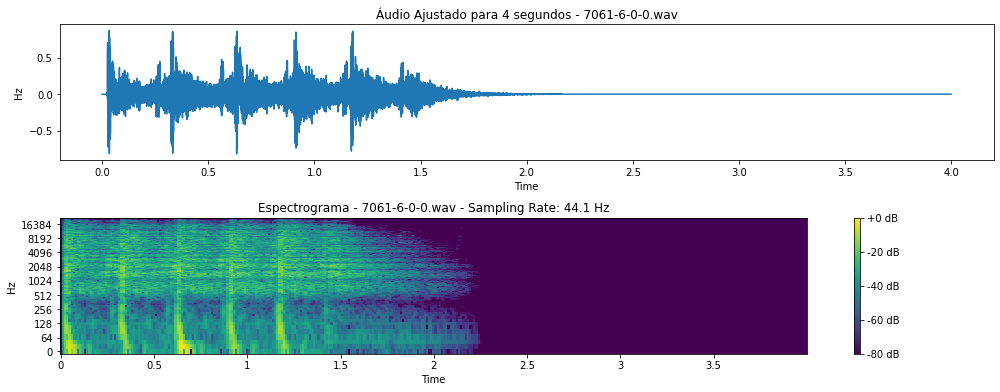

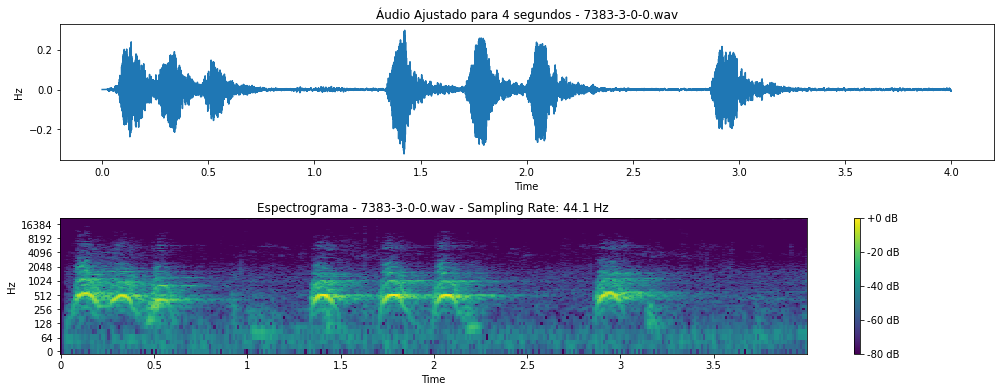

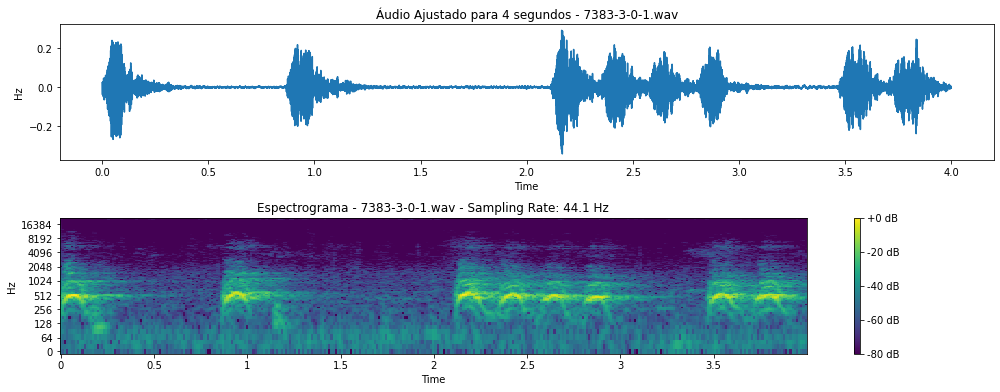

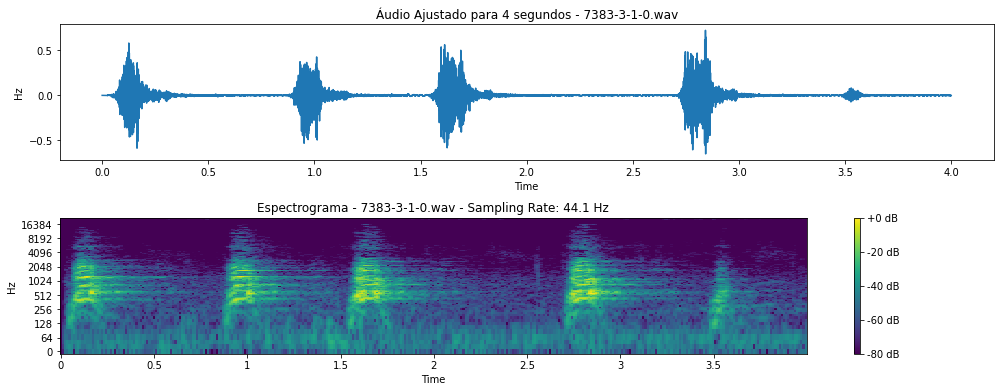

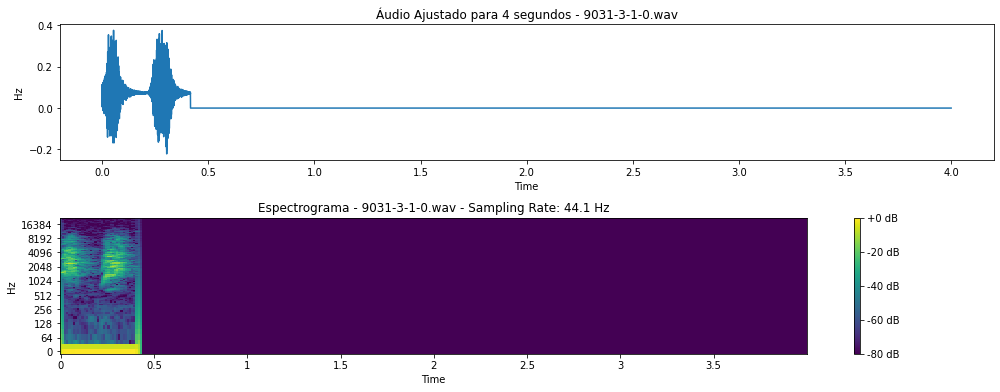

In [7]:
# Lista todos os arquivos na pasta e ordena por número de forma ascendente
audio_files = sorted([f for f in os.listdir(audio_folder) if f.endswith('.wav')], key=lambda x: int(''.join(filter(str.isdigit, x))) if any(c.isdigit() for c in x) else float('inf'))[:5]



# Itera sobre os arquivos ordenados
for filename in audio_files:
    if filename.endswith('.wav'):  # Certifique-se de que são arquivos de áudio WAV ou outro formato suportado
        audio_path = os.path.join(audio_folder, filename)
        
        # Ajusta o áudio para 4 segundos
        y_adjusted, sr = adjust_audio_duration(audio_path, target_duration=4.0)
        
        # Obtém a classe do áudio a partir do dataset
        # classe_do_audio = dataset.loc[dataset['classID'] == filename, 'class'].values[0]
    
        # Calcula o espectrograma
        spectrogram = np.abs(librosa.stft(y_adjusted))

        # Exibe o áudio ajustado, a forma de onda do áudio e o espectrograma
        plt.figure(figsize=(14, 8))

        plt.subplot(3, 1, 2)
        plt.plot(np.linspace(0, len(y_adjusted) / sr, num=len(y_adjusted)), y_adjusted)
        plt.title('Áudio Ajustado para 4 segundos - {}'.format(filename))
        plt.xlabel('Time')
        plt.ylabel('Hz')
        
        plt.subplot(3, 1, 3)
        librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), y_axis='log', x_axis='time', sr=sr, cmap='viridis')
        plt.title('Espectrograma - {} - Sampling Rate: {} Hz'.format(filename,sr/1000))
        plt.colorbar(format='%+2.0f dB')
    
        plt.tight_layout()
        plt.show()
        ipd.display(ipd.Audio(y_adjusted, rate=sr))

### Função para extração das features usando a biblioteca librosa

In [8]:
def extract_features(audio_path, target_duration=4.0):
    # Carrega o áudio e ajusta a duração
    y, sr = librosa.load(audio_path, duration=target_duration)
    hop_length = 512
    oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)

    # Extrair as características do áudio
    
    #Spectral features
    
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
    chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
    melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    spectral_flatness = librosa.feature.spectral_flatness(y=y)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    poly_features = librosa.feature.poly_features(y=y, sr=sr)
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    
    features = {
        'chroma_stft': np.mean(chroma_stft),
        'chroma_cqt': np.mean(chroma_cqt),
        'chroma_cens': np.mean(chroma_cens),
        'melspectrogram': np.mean(melspectrogram),
        'rms': np.mean(rms),
        'centroid': np.mean(spectral_centroid),
        'bandwidth': np.mean(spectral_bandwidth),
        'contrast': np.mean(spectral_contrast),
        'flatness': np.mean(spectral_flatness),
        'rolloff': np.mean(spectral_rolloff),
        'tonnetz' : np.mean(tonnetz),
        'zero_crossing_rate': np.mean(zero_crossing_rate),
        'poly_features' : np.mean(poly_features),
    }

    for i in range(1, 41):
        features[f'mcffs_{i}'] = np.mean(mfccs[i - 1])
        
    return features

In [9]:
# Estas características abrangem informações variadas do áudio, incluindo timbre (MFCCs e Chroma), aspectos temporais (onset strength), propriedades de amplitude (zero-crossing rate e RMSE), e propriedades espectrais (spectral flatness, spectral centroid e spectral bandwidth). A escolha dessas características pode variar dependendo do tipo de áudio e da tarefa de classificação que está sendo realizada. Experimente diferentes combinações de características e veja qual conjunto funciona melhor para o seu caso específico.


### Função que percorre todas as pastas com audios de modo a fazer a extração das features

In [10]:
def process_data (base_dir):
    for folder in os.listdir(base_dir):
        features_list = []
        label_list = []
        fold_dir = os.path.join(base_dir, folder)
        if os.path.isdir(fold_dir):
            for filename in os.listdir(fold_dir):
                file_path = os.path.join(fold_dir, filename)
                if filename.endswith('.wav'):
                    # Verifica se o arquivo está no DataFrame
                    row = df[df['slice_file_name'] == filename]
                    if not row.empty:
                        label = row['classID'].values[0]
                        features = extract_features(file_path)
                        features_list.append(features)
                        label_list.append(label)
        features_df=pd.DataFrame(features_list)
    
        features_df['Class'] = label_list
        features_df.to_csv('features'+folder+'.csv')
        print(features_df.head())
    return features_df
        

base_dir = 'C:/Users/andre/Documents/Faculdade/3ano_1sem/ACII/UrbanSound8K/audio'
urbansounds_df = process_data(base_dir)




C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=566
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=900
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=951
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=476
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=716
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=642
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=321
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=161
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=799
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=400
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=745
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=373
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=187
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=910
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=455
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=376
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=610
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=305
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=592
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=573
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=574
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=287
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=144
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=792
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

   chroma_stft  chroma_cqt  chroma_cens  melspectrogram       rms  \
0     0.445801    0.559713     0.271074        3.025563  0.064127   
1     0.395806    0.561527     0.274245        2.735209  0.070910   
2     0.523600    0.612471     0.279564        1.727484  0.038650   
3     0.420314    0.554667     0.273006        0.281586  0.028449   
4     0.591936    0.663967     0.278611        0.223179  0.020878   

      centroid    bandwidth   contrast  flatness      rolloff  ...  mcffs_32  \
0  1272.322596  1929.385330  21.229881  0.003123  2479.367859  ... -0.492060   
1  1091.849192  1661.472736  22.637942  0.001887  1851.108652  ... -1.524117   
2  1469.074963  2115.254016  19.706567  0.008064  2830.247048  ... -1.535643   
3  2280.391532  2262.256713  19.791382  0.032866  4217.020040  ... -1.704635   
4  1427.121009  2159.521180  18.934108  0.013790  2870.109194  ...  1.231341   

   mcffs_33  mcffs_34  mcffs_35  mcffs_36  mcffs_37  mcffs_38  mcffs_39  \
0 -3.183782  0.052147 -2.5222

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=894
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=447
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=224
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=724
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=362
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=683
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=621
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=311
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=156
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=634
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=317
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=159
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=597
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=676
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=990
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=495
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=248
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=811
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=406
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

   chroma_stft  chroma_cqt  chroma_cens  melspectrogram       rms  \
0     0.353847    0.571239     0.280303        0.381205  0.041719   
1     0.483272    0.671517     0.285768        0.213664  0.031859   
2     0.351821    0.648673     0.279960        0.217073  0.039540   
3     0.497890    0.707808     0.284976        0.144776  0.027866   
4     0.352928    0.576470     0.266824        9.928281  0.194223   

      centroid    bandwidth   contrast  flatness      rolloff  ...  mcffs_32  \
0  2244.903027  2582.639445  21.211227  0.015622  5062.225342  ... -1.202059   
1  2287.902165  2399.048101  21.648299  0.021644  4566.911515  ... -3.357098   
2  2658.458058  2435.765982  22.770216  0.020866  5074.658203  ...  2.216005   
3  2428.110524  2416.151425  21.278114  0.026887  4858.813477  ...  3.524665   
4  3234.695900  2700.758526  22.076756  0.031261  6726.733398  ... -0.172835   

   mcffs_33  mcffs_34  mcffs_35  mcffs_36  mcffs_37  mcffs_38   mcffs_39  \
0 -2.044167  3.839334 -6.980

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=559
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=280
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=683
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=342
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=626
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=313
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=965
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=483
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=242
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=820
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=703
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=708
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=354
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=177
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=707
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=700
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=907
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=953
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=819
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=221
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=951
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=476
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=238
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=577
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=576
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=288
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=144
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=541
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=271
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

   chroma_stft  chroma_cqt  chroma_cens  melspectrogram       rms  \
0     0.421035    0.596134     0.277365        1.100321  0.050663   
1     0.404458    0.588112     0.276284        1.182545  0.050825   
2     0.415571    0.595754     0.279878        1.089658  0.045925   
3     0.396457    0.557634     0.273136        1.700688  0.057532   
4     0.495882    0.665758     0.281093        0.167323  0.022238   

      centroid    bandwidth   contrast  flatness      rolloff  ...  mcffs_32  \
0  2134.563996  1710.030818  20.951091  0.013501  3428.446899  ...  2.833068   
1  2092.131632  1582.580339  20.582664  0.011403  3173.035726  ...  1.185976   
2  2091.179247  1605.886534  20.255547  0.012868  3238.382152  ...  0.229474   
3  2014.319880  1499.496641  20.839413  0.009972  3060.888813  ... -0.969802   
4  2358.879985  2137.336626  17.830943  0.045022  4198.051758  ... -0.296388   

   mcffs_33  mcffs_34  mcffs_35  mcffs_36  mcffs_37  mcffs_38  mcffs_39  \
0 -2.623472  2.111799  0.4296

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=524
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=872
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=914
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=457
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=517
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=892
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=617
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=792
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=758
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=709
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=745
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=373
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=756
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=378
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=876
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=323
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=818
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=409
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=731
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=868
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=854
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=910
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=455
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=527
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

   chroma_stft  chroma_cqt  chroma_cens  melspectrogram       rms  \
0     0.433149    0.600546     0.279427        0.170550  0.022765   
1     0.521690    0.668936     0.282055        2.038464  0.106494   
2     0.603787    0.665428     0.280408        3.143876  0.143156   
3     0.640937    0.639250     0.277068        3.517530  0.147511   
4     0.632808    0.638626     0.277802        3.446131  0.146118   

      centroid    bandwidth   contrast  flatness      rolloff  ...  mcffs_32  \
0  2446.028613  2255.406678  18.803328  0.040394  4450.589466  ... -1.583593   
1  2659.554877  1949.577399  21.208879  0.023126  4206.816180  ...  3.390362   
2  2401.793477  1791.653465  21.014373  0.015758  3814.550922  ...  4.247619   
3  2286.545130  1770.464802  21.362692  0.014185  3675.767561  ...  4.251390   
4  2296.005793  1783.682922  21.391066  0.015546  3665.312133  ...  3.444574   

   mcffs_33  mcffs_34  mcffs_35  mcffs_36  mcffs_37  mcffs_38  mcffs_39  \
0 -3.407521  0.548497 -3.0207

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=816
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=552
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=276
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=676
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=338
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=813
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=407
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=204
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=822
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=411
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=965
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=366
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=799
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=400
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=533
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=655
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=328
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=490
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=722
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=361
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=893
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=447
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=224
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=869
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=435
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

   chroma_stft  chroma_cqt  chroma_cens  melspectrogram       rms  \
0     0.458842    0.653919     0.283252        0.050471  0.013894   
1     0.230843    0.490274     0.264043        0.012908  0.006869   
2     0.402055    0.617801     0.277096        0.004098  0.004611   
3     0.248293    0.484140     0.266963        0.020077  0.009531   
4     0.553183    0.546464     0.271684        0.012856  0.008225   

      centroid    bandwidth   contrast  flatness      rolloff  ...  mcffs_32  \
0  2284.820711  2202.102614  19.102446  0.034939  4110.913450  ...  0.487781   
1  2595.194674  2420.471017  21.110440  0.023919  5184.896586  ...  5.171669   
2  3005.433745  2565.850403  19.770565  0.071225  5829.087874  ...  2.468214   
3  2969.865530  2626.990236  20.981222  0.040964  5915.158451  ...  2.916133   
4  2419.997831  2173.467485  19.650331  0.036739  4707.805444  ... -1.144933   

   mcffs_33  mcffs_34  mcffs_35  mcffs_36  mcffs_37  mcffs_38  mcffs_39  \
0 -1.678727  1.410535 -1.7127

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=876
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=438
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=219
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=110
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=873
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=437
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=749
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=375
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=798
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=709
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=355
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=414
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=797
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=727
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=600
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=993
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=497
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=613
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=965
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=483
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=242
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=121
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=673
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

   chroma_stft  chroma_cqt  chroma_cens  melspectrogram       rms  \
0     0.342925    0.523729     0.270312        4.515515  0.126444   
1     0.502187    0.704434     0.281023        0.002774  0.003993   
2     0.535061    0.682461     0.278783        0.001810  0.003006   
3     0.441757    0.603883     0.277310        0.004552  0.004653   
4     0.530755    0.556548     0.275156        0.001949  0.003216   

      centroid    bandwidth   contrast  flatness      rolloff  ...  mcffs_32  \
0  2089.849953  1736.189528  21.621388  0.005708  2875.451660  ...  7.510886   
1  2137.808989  1971.446838  20.221480  0.011596  3996.089516  ...  2.277220   
2  1846.767527  1950.695683  19.649264  0.008446  3695.993836  ... -0.154539   
3  2301.066813  2262.904380  20.470861  0.020788  4502.928841  ...  1.279155   
4  2004.947175  1951.244545  19.610958  0.009969  3927.071244  ... -0.774089   

   mcffs_33  mcffs_34  mcffs_35  mcffs_36  mcffs_37  mcffs_38  mcffs_39  \
0 -0.885359  2.393814 -6.3923

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=603
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=1020
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=510
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=255
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=903
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=965
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=483
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=242
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=121
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=1019
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=583
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=292
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=765
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=383
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=561
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=556
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=278
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=249
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=125
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=955
  warnings.warn(


   chroma_stft  chroma_cqt  chroma_cens  melspectrogram       rms  \
0     0.559152    0.700408     0.285539        0.287792  0.036457   
1     0.534395    0.644574     0.283104        2.015125  0.100865   
2     0.544626    0.672565     0.285384        0.476941  0.050473   
3     0.625679    0.759648     0.285852        0.686631  0.058281   
4     0.507904    0.718919     0.284452        0.380082  0.042241   

      centroid    bandwidth   contrast  flatness      rolloff  ...  mcffs_32  \
0  3574.630967  2578.230464  18.841002  0.103506  6657.369378  ...  3.109385   
1  3289.877463  2491.533016  19.058830  0.084920  6148.289604  ...  4.922350   
2  3194.741895  2358.003725  18.646189  0.076944  5686.943839  ...  4.407555   
3  2945.500877  2812.330965  17.911242  0.089349  6499.791140  ...  3.094439   
4  2541.069048  2648.799239  18.172173  0.051777  5690.242278  ...  3.134973   

   mcffs_33  mcffs_34  mcffs_35  mcffs_36  mcffs_37  mcffs_38  mcffs_39  \
0 -2.080568  2.165513 -3.8676

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=703
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=352
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=882
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=441
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=586
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=758
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=379
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=602
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=972
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=486
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=905
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=159
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=600
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=300
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=800
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=717
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=359
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=180
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=90
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=988
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\si

   chroma_stft  chroma_cqt  chroma_cens  melspectrogram       rms  \
0     0.397373    0.424002     0.258243        0.551967  0.047048   
1     0.422297    0.418285     0.256499        0.525703  0.045951   
2     0.409198    0.427166     0.255655        0.498180  0.044939   
3     0.398596    0.449678     0.255650        0.573580  0.047667   
4     0.425841    0.493966     0.266249        0.410048  0.040159   

      centroid    bandwidth   contrast  flatness      rolloff  ...  mcffs_32  \
0  1379.222280  1934.779394  21.841274  0.003653  2505.444195  ... -2.055787   
1  1372.665792  1930.772697  21.633497  0.003927  2497.229216  ... -2.525715   
2  1480.377737  2004.847751  22.084130  0.004507  2863.542607  ... -0.986494   
3  1374.669956  1899.050415  22.205454  0.003502  2634.021067  ...  0.788770   
4  1343.352316  1893.066544  20.572762  0.004433  2431.882790  ... -0.151675   

   mcffs_33  mcffs_34  mcffs_35  mcffs_36  mcffs_37  mcffs_38  mcffs_39  \
0 -2.061057  2.585048 -4.4026

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=668
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=334
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=621
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=311
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=776
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=388
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=638
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=836
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=418
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=590
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=969
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=485
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=882
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=907
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=561
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=920
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=802
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=702
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=564
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

   chroma_stft  chroma_cqt  chroma_cens  melspectrogram       rms  \
0     0.298557    0.489533     0.265880        2.171478  0.043682   
1     0.249322    0.427730     0.252688        5.639101  0.089814   
2     0.292587    0.493539     0.264134        3.380812  0.073360   
3     0.466226    0.632482     0.278680        1.127314  0.073104   
4     0.463087    0.586579     0.277274        1.034284  0.069865   

      centroid    bandwidth   contrast  flatness      rolloff  ...  mcffs_32  \
0  1366.653319  1776.833099  22.002282  0.003694  2214.956637  ...  0.539304   
1  1248.092141  1523.825254  22.384928  0.001976  1827.502441  ... -0.182392   
2  1198.050617  1489.821440  22.826544  0.001286  1733.422852  ... -0.753595   
3  2340.514287  2016.318796  19.949570  0.026422  4432.977048  ...  6.212684   
4  2444.639050  2157.429623  20.045069  0.032550  4695.109567  ...  8.288436   

   mcffs_33  mcffs_34  mcffs_35  mcffs_36  mcffs_37  mcffs_38  mcffs_39  \
0 -0.632341  1.068683  1.1267

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=793
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=397
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=758
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=379
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=971
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=486
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=562
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=648
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=324
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=579
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=290
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=145
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=73
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=825
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\si

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=909
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=688
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=344
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=169
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=552
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\s

   chroma_stft  chroma_cqt  chroma_cens  melspectrogram       rms  \
0     0.475005    0.671344     0.280346        0.635895  0.087440   
1     0.389542    0.606423     0.278319        0.688865  0.090911   
2     0.443765    0.601875     0.278630        0.713260  0.092560   
3     0.498970    0.615763     0.278120        0.678522  0.089096   
4     0.501920    0.611138     0.277630        0.577139  0.078671   

      centroid    bandwidth   contrast  flatness      rolloff  ...  mcffs_32  \
0  5065.193852  2938.446260  18.971361  0.108621  8847.470393  ...  3.212432   
1  4542.653223  2904.973014  20.078371  0.029818  8319.782447  ...  2.911234   
2  4902.830395  2930.293272  19.718682  0.067427  8710.429603  ...  2.915511   
3  5081.332822  2950.998007  19.477569  0.097678  8850.644362  ...  2.744623   
4  4657.044530  2960.616543  19.482536  0.067443  8445.620992  ...  2.305083   

   mcffs_33  mcffs_34  mcffs_35  mcffs_36  mcffs_37  mcffs_38  mcffs_39  \
0 -5.028516  3.729041 -3.8122

# Data pre-processing e implementação das neural networks


#### Standard scalling dos dados de treino e criação dos training e test sets

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Normalização dos Dados
def standard_scalling(X):
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)
    X = X_normalized
    
    return X

In [34]:
def load_fold_data(fold_file):
    fold = pd.read_csv(fold_file)
    
    # Assuming 'Class' is the column name for labels
    y = fold['Class'].values
    X = fold.drop(columns=['Class']).values
    
    # Normalização dos Dados
    X = standard_scalling(X)
    
    return X, y

In [67]:
# import Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define the classifiers to use
classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    SGDClassifier(),
    MLPClassifier(),
    XGBClassifier()
]

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall'])

# Loop through the classifiers
for clf in classifiers:
    # Fit the classifier to the training data
    clf.fit(X_train, y_train)
    
    # Evaluate the classifier on the test data
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    
    # Store the results in the DataFrame
    results = results.append({'Classifier': clf.__class__.__name__,
                              'Accuracy': accuracy,
                              'Precision': precision,
                              'Recall': recall},
                             ignore_index=True)

# Sort the DataFrame by the Accuracy column in descending order
results.sort_values(by='Accuracy', ascending=False, inplace=True)

# show the DataFrame
results

C:\Users\andre\AppData\Local\Temp\ipykernel_24908\3074236645.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Classifier': clf.__class__.__name__,
C:\Users\andre\AppData\Local\Temp\ipykernel_24908\3074236645.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Classifier': clf.__class__.__name__,
C:\Users\andre\AppData\Local\Temp\ipykernel_24908\3074236645.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Classifier': clf.__class__.__name__,
C:\Users\andre\AppData\Local\Temp\ipykernel_24908\3074236645.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

,Classifier,Accuracy,Precision,Recall
2,RandomForestClassifier,0.542892,0.60479,0.567686
7,XGBClassifier,0.531863,0.61068,0.561244
4,GradientBoostingClassifier,0.498775,0.550807,0.51818
0,KNeighborsClassifier,0.480392,0.531821,0.492397
5,SGDClassifier,0.459559,0.599167,0.483517
6,MLPClassifier,0.449755,0.567255,0.475735
3,AdaBoostClassifier,0.368873,0.424563,0.410353
1,DecisionTreeClassifier,0.3125,0.324794,0.329677


#### Implementação de rede neuronal MLP usando o tensorflow

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adadelta, Nadam
from tensorflow.keras.layers import Flatten, Dense

def MLP(X_train, y_train, X_test, y_test):
    # Assuming X_train and X_test are 2D arrays (e.g., feature vectors)
    input_shape = X_train.shape[1:]  # Shape of each input sample

    # Normalize the input data
    X_train = X_train.astype('float32') / np.max(X_train)
    X_test = X_test.astype('float32') / np.max(X_test)

    # One-hot encode the labels (assuming y_train and y_test are class labels)
    num_classes = len(np.unique(y_train))
    y_train_onehot = np.eye(num_classes)[y_train]
    y_test_onehot = np.eye(num_classes)[y_test]

    # Ajuste o valor da learning rate conforme necessário
    learning_rate = 0.1
    
    # Crie um otimizador com a taxa de aprendizado desejada
    optimizer = SGD(learning_rate=learning_rate)

    # Build the MLP model
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile o modelo usando o otimizador personalizado
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train_onehot, epochs=40, batch_size=128, validation_split=0.1)

    # Make predictions on the test data
    y_pred_onehot = model.predict(X_test)
    y_pred = np.argmax(y_pred_onehot, axis=1)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

    

In [123]:
from imblearn.over_sampling import SMOTE

n_folds=10
scores = [] 
for test_fold in range(1, n_folds + 1):
        X_train, y_train = [], []
        for fold in range(1, n_folds + 1):
            fold_file = f'C:/Users/andre/Documents/Faculdade/3ano_1sem/ACII/UrbanSound8K/audio/featuresfold{fold}.csv'
            features, labels = load_fold_data(fold_file)

            if fold == test_fold:
                X_test, y_test = features, labels
            else:
                X_train.append(features)
                y_train.append(labels)
                
        X_train = np.concatenate(X_train, axis=0)
        y_train = np.concatenate(y_train, axis=0)
        
        smote = SMOTE(random_state = 42)
        
        X_train, y_train = smote.fit_resample(X_train, y_train)
   
        accuracy = MLP(X_train, y_train, X_test, y_test)
        print(accuracy)
        scores.append(accuracy)
        

Epoch 1/40
64/64 [==============================] - 2s 12ms/step - loss: 2.1668 - accuracy: 0.2271 - val_loss: 2.5978 - val_accuracy: 0.1095
Epoch 2/40
64/64 [==============================] - 0s 6ms/step - loss: 1.9714 - accuracy: 0.3784 - val_loss: 2.3446 - val_accuracy: 0.2102
Epoch 3/40
64/64 [==============================] - 0s 5ms/step - loss: 1.8079 - accuracy: 0.4453 - val_loss: 2.1597 - val_accuracy: 0.2600
Epoch 4/40
64/64 [==============================] - 0s 5ms/step - loss: 1.6767 - accuracy: 0.4773 - val_loss: 2.0850 - val_accuracy: 0.2555
Epoch 5/40
64/64 [==============================] - 0s 5ms/step - loss: 1.5776 - accuracy: 0.5009 - val_loss: 1.8872 - val_accuracy: 0.2334
Epoch 6/40
64/64 [==============================] - 0s 5ms/step - loss: 1.4979 - accuracy: 0.5189 - val_loss: 1.9157 - val_accuracy: 0.3009
Epoch 7/40
64/64 [==============================] - 0s 5ms/step - loss: 1.4341 - accuracy: 0.5340 - val_loss: 1.4194 - val_accuracy: 0.5177
Epoch 8/40
64/64 [=

Epoch 19/40
64/64 [==============================] - 0s 6ms/step - loss: 1.1097 - accuracy: 0.6356 - val_loss: 0.8650 - val_accuracy: 0.8159
Epoch 20/40
64/64 [==============================] - 0s 5ms/step - loss: 1.1006 - accuracy: 0.6346 - val_loss: 0.8884 - val_accuracy: 0.7420
Epoch 21/40
64/64 [==============================] - 0s 6ms/step - loss: 1.0860 - accuracy: 0.6414 - val_loss: 0.8623 - val_accuracy: 0.8071
Epoch 22/40
64/64 [==============================] - 0s 6ms/step - loss: 1.0819 - accuracy: 0.6381 - val_loss: 0.7405 - val_accuracy: 0.8479
Epoch 23/40
64/64 [==============================] - 0s 6ms/step - loss: 1.0659 - accuracy: 0.6493 - val_loss: 0.8970 - val_accuracy: 0.7674
Epoch 24/40
64/64 [==============================] - 0s 5ms/step - loss: 1.0583 - accuracy: 0.6539 - val_loss: 0.9899 - val_accuracy: 0.7420
Epoch 25/40
64/64 [==============================] - 0s 6ms/step - loss: 1.0473 - accuracy: 0.6554 - val_loss: 0.7834 - val_accuracy: 0.8225
Epoch 26/40
6

64/64 [==============================] - 0s 5ms/step - loss: 0.9556 - accuracy: 0.6835 - val_loss: 0.6233 - val_accuracy: 0.8378
Epoch 37/40
64/64 [==============================] - 0s 6ms/step - loss: 0.9491 - accuracy: 0.6901 - val_loss: 0.7484 - val_accuracy: 0.7811
Epoch 38/40
64/64 [==============================] - 0s 6ms/step - loss: 0.9372 - accuracy: 0.6933 - val_loss: 0.7496 - val_accuracy: 0.7678
Epoch 39/40
64/64 [==============================] - 0s 6ms/step - loss: 0.9311 - accuracy: 0.6962 - val_loss: 0.5900 - val_accuracy: 0.8311
Epoch 40/40
28/28 [==============================] - 0s 3ms/step
0.44256756756756754
Epoch 1/40
64/64 [==============================] - 2s 12ms/step - loss: 2.1766 - accuracy: 0.2258 - val_loss: 2.5884 - val_accuracy: 0.1622
Epoch 2/40
64/64 [==============================] - 0s 6ms/step - loss: 1.9942 - accuracy: 0.3740 - val_loss: 2.4961 - val_accuracy: 0.2089
Epoch 3/40
64/64 [==============================] - 0s 6ms/step - loss: 1.8439 - a

64/64 [==============================] - 0s 6ms/step - loss: 1.2228 - accuracy: 0.5968 - val_loss: 0.9637 - val_accuracy: 0.7467
Epoch 14/40
64/64 [==============================] - 0s 6ms/step - loss: 1.2034 - accuracy: 0.6091 - val_loss: 1.0590 - val_accuracy: 0.6244
Epoch 15/40
64/64 [==============================] - 0s 5ms/step - loss: 1.1771 - accuracy: 0.6112 - val_loss: 0.8501 - val_accuracy: 0.7478
Epoch 16/40
64/64 [==============================] - 0s 5ms/step - loss: 1.1594 - accuracy: 0.6179 - val_loss: 0.7542 - val_accuracy: 0.8267
Epoch 17/40
64/64 [==============================] - 0s 6ms/step - loss: 1.1418 - accuracy: 0.6194 - val_loss: 0.9974 - val_accuracy: 0.7000
Epoch 18/40
64/64 [==============================] - 0s 6ms/step - loss: 1.1327 - accuracy: 0.6222 - val_loss: 0.8199 - val_accuracy: 0.7711
Epoch 19/40
64/64 [==============================] - 0s 5ms/step - loss: 1.1159 - accuracy: 0.6307 - val_loss: 0.8433 - val_accuracy: 0.7622
Epoch 20/40
64/64 [======

Epoch 31/40
64/64 [==============================] - 0s 6ms/step - loss: 0.9954 - accuracy: 0.6768 - val_loss: 0.8796 - val_accuracy: 0.7344
Epoch 32/40
64/64 [==============================] - 0s 5ms/step - loss: 0.9902 - accuracy: 0.6846 - val_loss: 0.5461 - val_accuracy: 0.8556
Epoch 33/40
64/64 [==============================] - 0s 5ms/step - loss: 0.9852 - accuracy: 0.6841 - val_loss: 0.8774 - val_accuracy: 0.7544
Epoch 34/40
64/64 [==============================] - 0s 5ms/step - loss: 0.9708 - accuracy: 0.6863 - val_loss: 0.5904 - val_accuracy: 0.8500
Epoch 35/40
64/64 [==============================] - 0s 6ms/step - loss: 0.9696 - accuracy: 0.6847 - val_loss: 0.5822 - val_accuracy: 0.8578
Epoch 36/40
64/64 [==============================] - 0s 5ms/step - loss: 0.9608 - accuracy: 0.6874 - val_loss: 0.6353 - val_accuracy: 0.8422
Epoch 37/40
64/64 [==============================] - 0s 6ms/step - loss: 0.9520 - accuracy: 0.6891 - val_loss: 0.5548 - val_accuracy: 0.8578
Epoch 38/40
6

65/65 [==============================] - 0s 6ms/step - loss: 1.3645 - accuracy: 0.5636 - val_loss: 1.6378 - val_accuracy: 0.3939
Epoch 9/40
65/65 [==============================] - 0s 6ms/step - loss: 1.3237 - accuracy: 0.5750 - val_loss: 1.6398 - val_accuracy: 0.3734
Epoch 10/40
65/65 [==============================] - 0s 6ms/step - loss: 1.2902 - accuracy: 0.5832 - val_loss: 1.3744 - val_accuracy: 0.5476
Epoch 11/40
65/65 [==============================] - 0s 6ms/step - loss: 1.2604 - accuracy: 0.5933 - val_loss: 1.3759 - val_accuracy: 0.5260
Epoch 12/40
65/65 [==============================] - 0s 6ms/step - loss: 1.2340 - accuracy: 0.5956 - val_loss: 1.1010 - val_accuracy: 0.6721
Epoch 13/40
65/65 [==============================] - 0s 6ms/step - loss: 1.2087 - accuracy: 0.6055 - val_loss: 1.2388 - val_accuracy: 0.5898
Epoch 14/40
65/65 [==============================] - 0s 6ms/step - loss: 1.1820 - accuracy: 0.6128 - val_loss: 1.1507 - val_accuracy: 0.6212
Epoch 15/40
65/65 [=======

Epoch 26/40
65/65 [==============================] - 0s 6ms/step - loss: 1.0210 - accuracy: 0.6646 - val_loss: 0.9313 - val_accuracy: 0.7093
Epoch 27/40
65/65 [==============================] - 0s 6ms/step - loss: 1.0087 - accuracy: 0.6680 - val_loss: 0.7988 - val_accuracy: 0.7711
Epoch 28/40
65/65 [==============================] - 0s 6ms/step - loss: 0.9984 - accuracy: 0.6780 - val_loss: 0.8027 - val_accuracy: 0.7625
Epoch 29/40
65/65 [==============================] - 0s 6ms/step - loss: 0.9960 - accuracy: 0.6706 - val_loss: 0.7042 - val_accuracy: 0.8156
Epoch 30/40
65/65 [==============================] - 0s 5ms/step - loss: 0.9795 - accuracy: 0.6781 - val_loss: 0.7575 - val_accuracy: 0.8243
Epoch 31/40
65/65 [==============================] - 0s 5ms/step - loss: 0.9762 - accuracy: 0.6744 - val_loss: 0.7530 - val_accuracy: 0.8091
Epoch 32/40
65/65 [==============================] - 0s 5ms/step - loss: 0.9651 - accuracy: 0.6822 - val_loss: 0.6832 - val_accuracy: 0.8319
Epoch 33/40
6

In [124]:
# Exibir os resultados da validação cruzada
print("Scores de cada fold:", scores)
media = np.mean(scores)
desvio_padrao = np.std(scores)
print(f"Média dos scores: {media:.2f}")
print(f"Desvio padrão dos scores: {desvio_padrao:.2f}")

Scores de cada fold: [0.43757159221076747, 0.4743130227001195, 0.44256756756756754, 0.4518918918918919, 0.598989898989899, 0.530982905982906, 0.31470230862697446, 0.5775656324582339, 0.5483870967741935, 0.5073529411764706]
Média dos scores: 0.49
Desvio padrão dos scores: 0.08


#### Implementação de rede neuronal CNN usando o tensorflow

In [100]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

def CNN(X_train, y_train, X_test, y_test):
    # Assuming X_train and X_test are 2D arrays (e.g., time series data)
    input_shape = X_train.shape[1:]  # Shape of each input sample

    # Reshape the input data if needed
    X_train = X_train.reshape(X_train.shape[0], *input_shape, 1)
    X_test = X_test.reshape(X_test.shape[0], *input_shape, 1)

    # Normalize the input data
    X_train = X_train.astype('float32') / np.max(X_train)
    X_test = X_test.astype('float32') / np.max(X_test)

    # One-hot encode the labels (assuming y_train and y_test are class labels)
    num_classes = len(np.unique(y_train))
    y_train_onehot = np.eye(num_classes)[y_train]
    y_test_onehot = np.eye(num_classes)[y_test]
    
    # Ajuste o valor da learning rate conforme necessário
    learning_rate = 0.1
    
    # Crie um otimizador com a taxa de aprendizado desejada
    optimizer = SGD(learning_rate=learning_rate)

    # Build the CNN model
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(input_shape[0], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile o modelo usando o otimizador personalizado
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train_onehot, epochs=40, batch_size=128, validation_split=0.1)

    # Make predictions on the test data
    y_pred_onehot = model.predict(X_test)
    y_pred = np.argmax(y_pred_onehot, axis=1)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy


In [110]:
from imblearn.over_sampling import SMOTE

n_folds=10
scores_cnn = [] 
for test_fold in range(1, n_folds + 1):
        X_train, y_train = [], []
        for fold in range(1, n_folds + 1):
            fold_file = f'C:/Users/andre/Documents/Faculdade/3ano_1sem/ACII/UrbanSound8K/audio/featuresfold{fold}.csv'
            features, labels = load_fold_data(fold_file)

            if fold == test_fold:
                X_test, y_test = features, labels
            else:
                X_train.append(features)
                y_train.append(labels)
                
        X_train = np.concatenate(X_train, axis=0)
        y_train = np.concatenate(y_train, axis=0)
        
        smote = SMOTE(random_state = 42)
        
        X_train, y_train = smote.fit_resample(X_train, y_train)
        
        accuracy_cnn = CNN(X_train, y_train, X_test, y_test)
        print(accuracy_cnn)
        scores_cnn.append(accuracy_cnn)

[[0.         0.32984344 0.59314381 ... 0.84299093 0.3827611  0.33157002]
 [0.00119617 0.53864207 0.78085009 ... 0.80798597 0.22311229 0.45435911]
 [0.00239234 0.3265744  0.73809031 ... 0.7875029  0.36025066 0.29108764]
 ...
 [0.5908351  0.00369275 0.14154988 ... 0.71194247 0.49007192 0.34891756]
 [0.34251276 0.25822093 0.53547316 ... 0.67500073 0.71003601 0.39322051]
 [0.9053315  0.28049979 0.40162595 ... 0.95172448 0.54086405 0.42852147]] [1 1 1 ... 9 9 9]
Epoch 1/40
64/64 [==============================] - 2s 19ms/step - loss: 2.2449 - accuracy: 0.1803 - val_loss: 2.8152 - val_accuracy: 0.0575
Epoch 2/40
64/64 [==============================] - 1s 11ms/step - loss: 2.1182 - accuracy: 0.2625 - val_loss: 2.5854 - val_accuracy: 0.1051
Epoch 3/40
64/64 [==============================] - 1s 11ms/step - loss: 1.9138 - accuracy: 0.3357 - val_loss: 2.5420 - val_accuracy: 0.1958
Epoch 4/40
64/64 [==============================] - 1s 11ms/step - loss: 1.7462 - accuracy: 0.3847 - val_loss: 1.83

Epoch 12/40
64/64 [==============================] - 1s 12ms/step - loss: 1.0669 - accuracy: 0.6411 - val_loss: 0.7378 - val_accuracy: 0.8181
Epoch 13/40
64/64 [==============================] - 1s 10ms/step - loss: 1.0234 - accuracy: 0.6599 - val_loss: 0.6933 - val_accuracy: 0.8445
Epoch 14/40
64/64 [==============================] - 1s 11ms/step - loss: 0.9808 - accuracy: 0.6711 - val_loss: 0.8795 - val_accuracy: 0.7663
Epoch 15/40
64/64 [==============================] - 1s 10ms/step - loss: 0.9505 - accuracy: 0.6869 - val_loss: 0.6383 - val_accuracy: 0.8401
Epoch 16/40
64/64 [==============================] - 1s 11ms/step - loss: 0.9081 - accuracy: 0.7002 - val_loss: 0.5619 - val_accuracy: 0.8721
Epoch 17/40
64/64 [==============================] - 1s 12ms/step - loss: 0.8703 - accuracy: 0.7155 - val_loss: 0.4802 - val_accuracy: 0.8798
Epoch 18/40
64/64 [==============================] - 1s 11ms/step - loss: 0.8474 - accuracy: 0.7235 - val_loss: 0.5446 - val_accuracy: 0.8578
Epoch 

Epoch 26/40
64/64 [==============================] - 1s 11ms/step - loss: 0.6450 - accuracy: 0.7948 - val_loss: 0.3422 - val_accuracy: 0.8922
Epoch 27/40
64/64 [==============================] - 1s 11ms/step - loss: 0.6328 - accuracy: 0.7956 - val_loss: 0.2606 - val_accuracy: 0.9322
Epoch 28/40
64/64 [==============================] - 1s 11ms/step - loss: 0.5933 - accuracy: 0.8111 - val_loss: 0.4774 - val_accuracy: 0.8489
Epoch 29/40
64/64 [==============================] - 1s 11ms/step - loss: 0.5816 - accuracy: 0.8132 - val_loss: 0.3111 - val_accuracy: 0.9133
Epoch 30/40
64/64 [==============================] - 1s 11ms/step - loss: 0.5617 - accuracy: 0.8180 - val_loss: 0.3537 - val_accuracy: 0.9011
Epoch 31/40
64/64 [==============================] - 1s 12ms/step - loss: 0.5466 - accuracy: 0.8209 - val_loss: 0.5510 - val_accuracy: 0.8278
Epoch 32/40
64/64 [==============================] - 1s 11ms/step - loss: 0.5230 - accuracy: 0.8337 - val_loss: 0.5592 - val_accuracy: 0.8100
Epoch 

Epoch 40/40
29/29 [==============================] - 0s 4ms/step
0.43027027027027026
[[0.         0.41398432 0.6604809  ... 0.61702713 0.36209044 0.17604593]
 [0.00114679 0.34953771 0.66341113 ... 0.67906756 0.35902713 0.1033351 ]
 [0.00229358 0.51427392 0.74571997 ... 0.63356415 0.36784269 0.21084583]
 ...
 [0.2534916  0.55903008 0.94681372 ... 0.74721009 0.63094721 0.19953852]
 [0.30755811 0.12491897 0.43895963 ... 0.58269849 0.56933668 0.28061062]
 [0.58755685 0.12197904 0.55554925 ... 0.62891885 0.66663653 0.3096454 ]] [3 3 3 ... 8 8 8]
Epoch 1/40
64/64 [==============================] - 2s 18ms/step - loss: 2.2556 - accuracy: 0.1769 - val_loss: 2.8333 - val_accuracy: 0.1567
Epoch 2/40
64/64 [==============================] - 1s 12ms/step - loss: 2.1540 - accuracy: 0.2759 - val_loss: 2.7068 - val_accuracy: 0.1522
Epoch 3/40
64/64 [==============================] - 1s 12ms/step - loss: 1.9272 - accuracy: 0.3616 - val_loss: 2.5281 - val_accuracy: 0.1189
Epoch 4/40
64/64 [============

64/64 [==============================] - 1s 11ms/step - loss: 1.1553 - accuracy: 0.6100 - val_loss: 1.0949 - val_accuracy: 0.7111
Epoch 11/40
64/64 [==============================] - 1s 11ms/step - loss: 1.1022 - accuracy: 0.6275 - val_loss: 1.3294 - val_accuracy: 0.4911
Epoch 12/40
64/64 [==============================] - 1s 12ms/step - loss: 1.0506 - accuracy: 0.6501 - val_loss: 1.1856 - val_accuracy: 0.6622
Epoch 13/40
64/64 [==============================] - 1s 12ms/step - loss: 0.9952 - accuracy: 0.6723 - val_loss: 0.8046 - val_accuracy: 0.7656
Epoch 14/40
64/64 [==============================] - 1s 11ms/step - loss: 0.9567 - accuracy: 0.6820 - val_loss: 0.5620 - val_accuracy: 0.8589
Epoch 15/40
64/64 [==============================] - 1s 11ms/step - loss: 0.9319 - accuracy: 0.6943 - val_loss: 0.5938 - val_accuracy: 0.8567
Epoch 16/40
64/64 [==============================] - 1s 12ms/step - loss: 0.8674 - accuracy: 0.7193 - val_loss: 0.6808 - val_accuracy: 0.8244
Epoch 17/40
64/64 

66/66 [==============================] - 1s 12ms/step - loss: 0.6611 - accuracy: 0.7835 - val_loss: 0.4271 - val_accuracy: 0.8723
Epoch 25/40
66/66 [==============================] - 1s 11ms/step - loss: 0.6094 - accuracy: 0.8072 - val_loss: 0.6008 - val_accuracy: 0.8240
Epoch 26/40
66/66 [==============================] - 1s 12ms/step - loss: 0.6088 - accuracy: 0.8028 - val_loss: 0.4238 - val_accuracy: 0.8863
Epoch 27/40
66/66 [==============================] - 1s 12ms/step - loss: 0.5839 - accuracy: 0.8166 - val_loss: 0.4706 - val_accuracy: 0.8766
Epoch 28/40
66/66 [==============================] - 1s 12ms/step - loss: 0.5588 - accuracy: 0.8240 - val_loss: 0.4406 - val_accuracy: 0.8788
Epoch 29/40
66/66 [==============================] - 1s 11ms/step - loss: 0.5556 - accuracy: 0.8205 - val_loss: 0.5000 - val_accuracy: 0.8498
Epoch 30/40
66/66 [==============================] - 1s 12ms/step - loss: 0.5422 - accuracy: 0.8256 - val_loss: 0.4396 - val_accuracy: 0.8873
Epoch 31/40
66/66 

65/65 [==============================] - 1s 12ms/step - loss: 0.4177 - accuracy: 0.8670 - val_loss: 0.3218 - val_accuracy: 0.9080
Epoch 39/40
65/65 [==============================] - 1s 11ms/step - loss: 0.4029 - accuracy: 0.8719 - val_loss: 0.1959 - val_accuracy: 0.9361
Epoch 40/40
27/27 [==============================] - 0s 4ms/step
0.5572792362768496
[[0.         0.41398432 0.6604809  ... 0.61702713 0.36209044 0.17604593]
 [0.00114679 0.34953771 0.66341113 ... 0.67906756 0.35902713 0.1033351 ]
 [0.00229358 0.51427392 0.74571997 ... 0.63356415 0.36784269 0.21084583]
 ...
 [0.13250998 0.24379382 0.5132381  ... 0.714581   0.55748528 0.43727376]
 [0.02003907 0.62523401 0.79619539 ... 0.6371634  0.45680204 0.2143236 ]
 [0.34949341 0.38357045 0.50037111 ... 0.67924701 0.52119758 0.3986328 ]] [3 3 3 ... 9 9 9]
Epoch 1/40
65/65 [==============================] - 2s 18ms/step - loss: 2.2544 - accuracy: 0.1720 - val_loss: 2.7968 - val_accuracy: 0.0879
Epoch 2/40
65/65 [=======================

65/65 [==============================] - 1s 11ms/step - loss: 1.3240 - accuracy: 0.5441 - val_loss: 1.0830 - val_accuracy: 0.7048
Epoch 9/40
65/65 [==============================] - 1s 12ms/step - loss: 1.2554 - accuracy: 0.5715 - val_loss: 1.0110 - val_accuracy: 0.7179
Epoch 10/40
65/65 [==============================] - 1s 12ms/step - loss: 1.1919 - accuracy: 0.5976 - val_loss: 0.8972 - val_accuracy: 0.7614
Epoch 11/40
65/65 [==============================] - 1s 12ms/step - loss: 1.1331 - accuracy: 0.6133 - val_loss: 0.5195 - val_accuracy: 0.8834
Epoch 12/40
65/65 [==============================] - 1s 12ms/step - loss: 1.0828 - accuracy: 0.6312 - val_loss: 0.9157 - val_accuracy: 0.7418
Epoch 13/40
65/65 [==============================] - 1s 11ms/step - loss: 1.0277 - accuracy: 0.6586 - val_loss: 0.6026 - val_accuracy: 0.8301
Epoch 14/40
65/65 [==============================] - 1s 12ms/step - loss: 0.9918 - accuracy: 0.6698 - val_loss: 0.5497 - val_accuracy: 0.8649
Epoch 15/40
65/65 [

In [111]:
# Exibir os resultados da validação cruzada
print("Scores de cada fold:", scores_cnn)
media = np.mean(scores_cnn)
desvio_padrao = np.std(scores_cnn)
print(f"Média dos scores: {media:.3f}")
print(f"Desvio padrão dos scores: {desvio_padrao:.3f}")

Scores de cada fold: [0.4146620847651776, 0.5173237753882916, 0.4605855855855856, 0.43027027027027026, 0.5363636363636364, 0.5470085470085471, 0.402187120291616, 0.5572792362768496, 0.4801488833746898, 0.5245098039215687]
Média dos scores: 0.487
Desvio padrão dos scores: 0.054


In [125]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint

# Defina os parâmetros a serem otimizados
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
}

# Inicialize o modelo MLP
mlp = MLPClassifier(max_iter=1000)

# Execute a pesquisa aleatória
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10, cv=3)
random_search.fit(X_train, y_train)

# Exiba os melhores parâmetros encontrados
print("Melhores parâmetros:", random_search.best_params_)

# Avalie o modelo no conjunto de teste
y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia no conjunto de teste:", accuracy)

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores parâmetros: {'hidden_layer_sizes': (50, 50), 'alpha': 0.0001, 'activation': 'relu'}
Acurácia no conjunto de teste: 0.49754901960784315
